## Analyzing a collection of Tweets
Download `realdonaldtrump.csv`, a collection of more than 43k tweets from Donald Trump between 2009 and 2020, from [kaggle](https://www.kaggle.com/austinreese/trump-tweets) and load the dataset with pandas:



In [2]:
import pandas as pd
import numpy as np

In [3]:
df_trump = pd.read_csv("realdonaldtrump.csv", na_values=['?','']) # Import
df_trump.set_index("id") # Set id as row index
df_trump["date"] = pd.to_datetime(df_trump['date']) # Set column to datetime

In [5]:
df_trump.head(10)

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN
5,1776419923,https://twitter.com/realDonaldTrump/status/177...,"Miss USA Tara Conner will not be fired - ""I've...",2009-05-12 14:21:55,29,28,NaN,NaN
6,1786560616,https://twitter.com/realDonaldTrump/status/178...,Listen to an interview with Donald Trump discu...,2009-05-13 12:38:28,15,16,NaN,NaN
7,1796477499,https://twitter.com/realDonaldTrump/status/179...,"""Strive for wholeness and keep your sense of w...",2009-05-14 11:30:40,18,27,NaN,NaN
8,1806258917,https://twitter.com/realDonaldTrump/status/180...,"Enter the ""Think Like A Champion"" signed book ...",2009-05-15 09:13:13,15,9,NaN,NaN
9,1820624395,https://twitter.com/realDonaldTrump/status/182...,"""When the achiever achieves, it's not a platea...",2009-05-16 17:22:45,19,47,NaN,NaN


Most retweeted and liked tweets

In [6]:
print("Most retweeted: {}".format(df_trump.iloc[df_trump["retweets"].argmax()]["content"]))
print("Most favorited: {}".format(df_trump.iloc[df_trump["favorites"].argmax()]["content"]))

Most retweeted: # FraudNewsCNN # FNNpic.twitter.com/WYUnHjjUjg
Most favorited: A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!


#### Word frequency analysis and wordcloud visualization
Clean the contents of the individual tweets and join into a long text

In [7]:
import re
# Get individual tweets
tweets = list(df_trump["content"])
# Clean by stripping URLs, any punctuations, twitter handles, realDonaldTrump and any non alphanumeric characters
tweets = [re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|realDonaldTrump"," ",tweet) for tweet in tweets]
# Join all tweets into a long text
text = " ".join(tweets)

Create wordcloud in shape of Trump outline

(-0.5, 1062.5, 1090.5, -0.5)

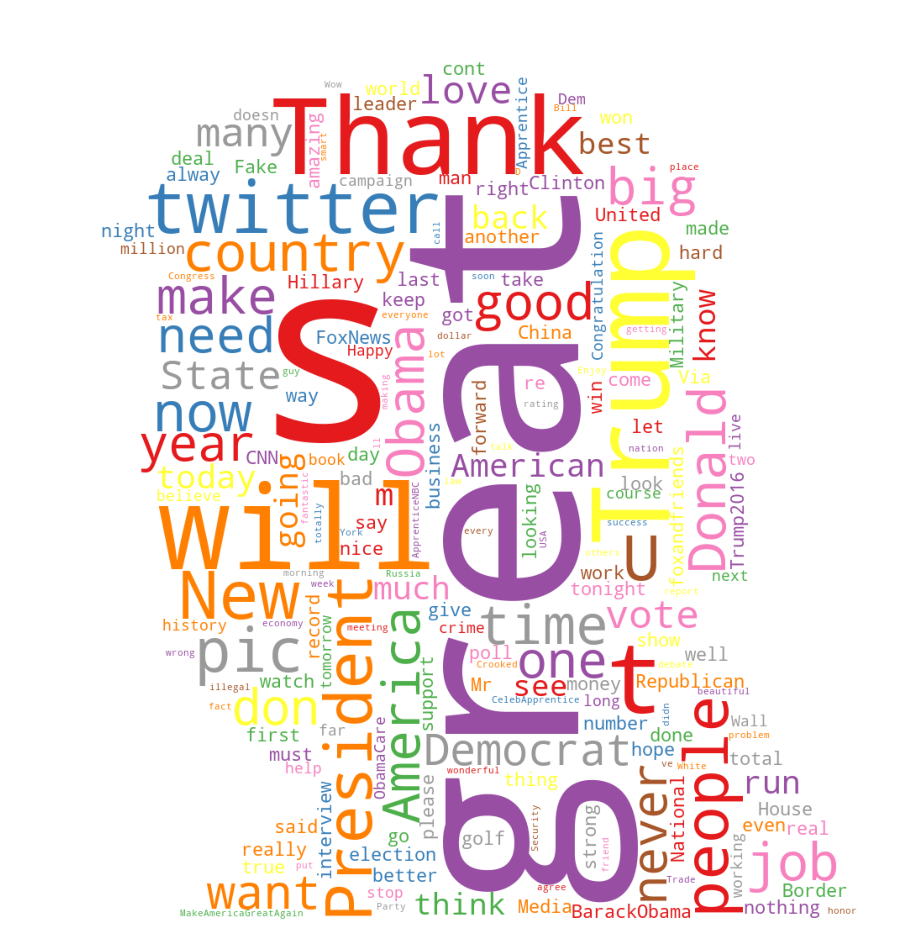

In [8]:

from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
mask = np.array(Image.open('trump_outline.jpeg'))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,
    background_color='white', colormap='Set1', collocations=False, stopwords = STOPWORDS, mask=mask).generate(text)
plt.figure(figsize=(16, 20))
plt.imshow(wordcloud)
plt.axis("off")

#### When does Trump tweet during the day?

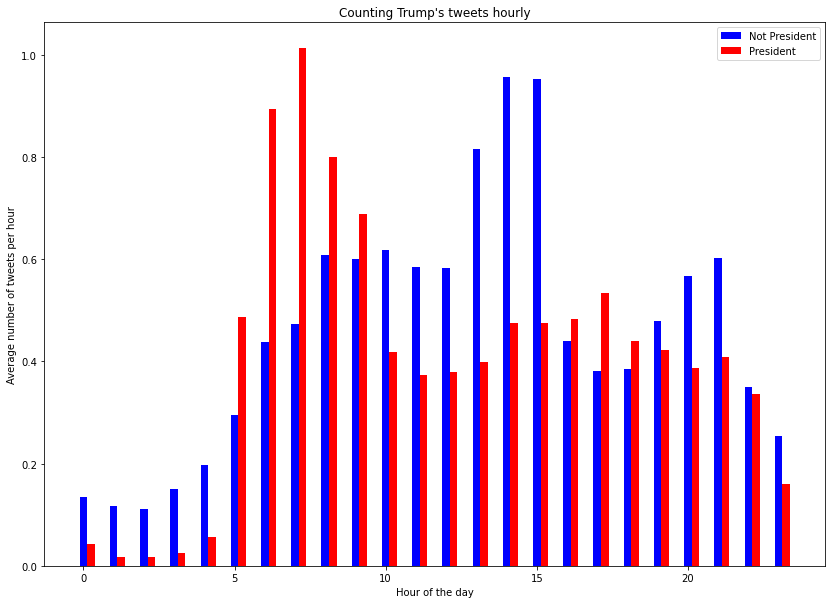

In [9]:
inaug_date = pd.to_datetime('2017-01-20')
df_trump["president"] = df_trump.apply(lambda x: x.date >= inaug_date, axis=1) # New column indicating whether Trump was president
days_before = pd.Timedelta(inaug_date - df_trump['date'].min()).days
days_after = pd.Timedelta(df_trump['date'].max() - inaug_date).days
avg_hourly_counts_before = df_trump[-df_trump.president]['date'].groupby(df_trump['date'].dt.hour).count()/days_before # Average number of hourly tweets
avg_hourly_counts_after = df_trump[df_trump.president]['date'].groupby(df_trump['date'].dt.hour).count()/days_after # Average number of hourly tweets
hours = np.arange(24)
plt.figure(figsize=(14, 10))
ax = plt.subplot(111)
ax.bar(hours,avg_hourly_counts_before, width=0.25, color='blue', label='Not President')
ax.bar(hours+0.25,avg_hourly_counts_after, width=0.25, color='red', label='President')
ax.set_xlabel("Hour of the day")
ax.set_ylabel("Average number of tweets per hour")
ax.set_title("Counting Trump's tweets hourly")
plt.legend()
plt.show()

#### How much has Trump tweeted over time?

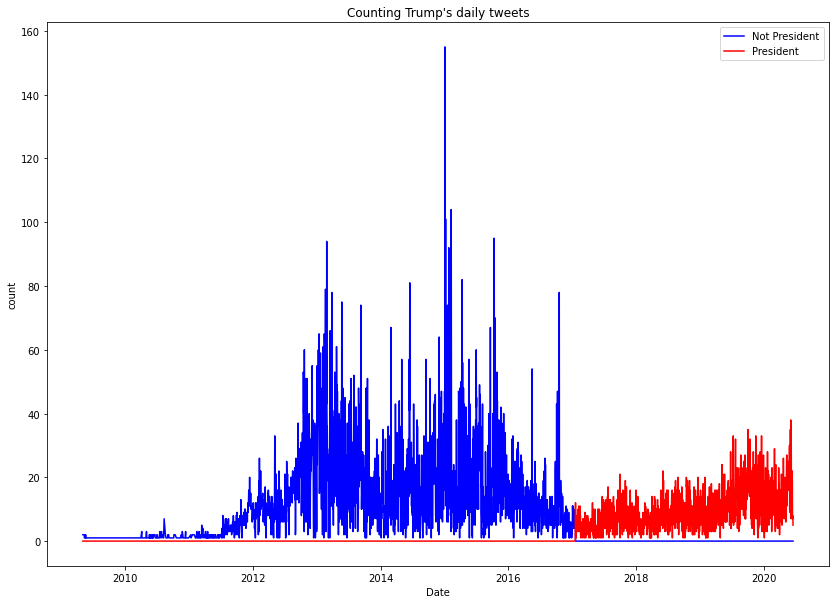

In [10]:
daily_counts = df_trump['date'].groupby([df_trump['date'].dt.date,df_trump.president]).count() # Count number of daily tweets
daily_counts = daily_counts.unstack(level=-1).fillna(0)
daily_counts.columns = ['not_president', 'president']
plt.figure(figsize=(14, 10))
ax = plt.subplot(111)
ax.plot(daily_counts.index, daily_counts['not_president'], color='blue', label='Not President')
ax.plot(daily_counts.index, daily_counts['president'], color='red', label='President')
ax.set_xlabel("Date")
ax.set_ylabel("count")
ax.set_title("Counting Trump's daily tweets")
plt.legend()
plt.show()